<a href="https://colab.research.google.com/github/huuphong1995/huuphong1995/blob/master/Spirit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pickle
with open('/content/drive/MyDrive/Spirit1G-test2.pkl', 'rb') as f:
    data1 = pickle.load(f)

In [ ]:
x_te = data1['x_te']
y_te = data1['y_te']

In [ ]:
import random
# Separate the anomaly and normal instances in the testing set
anomalies_te = [x for x, y in zip(x_te, y_te) if y == 1]
normal_te = [x for x, y in zip(x_te, y_te) if y == 0]

# Randomly sample equal number of anomalies and normal instances for testing
num_samples_te = min(len(anomalies_te), len(normal_te))
sampled_anomalies_te = random.sample(anomalies_te, num_samples_te)
sampled_normal_te = random.sample(normal_te, num_samples_te)

# Combine the sampled anomalies and normal instances for the balanced testing set
x_te_balanced = sampled_anomalies_te + sampled_normal_te
y_te_balanced = [1] * num_samples_te + [0] * num_samples_te

In [ ]:
from sklearn.utils import shuffle
x_te_balanced, y_te_balanced = shuffle(x_te_balanced, y_te_balanced)

In [ ]:
len(x_te_balanced)

17608

In [ ]:
len(y_te_balanced)

17608

In [ ]:
anomaly = [x for x, y in zip(x_te_balanced, y_te_balanced) if y == 1]
normal = [x for x, y in zip(x_te_balanced, y_te_balanced) if y == 0]

In [ ]:
len(anomaly)

8804

In [ ]:
len(normal)

8804

In [ ]:
import numpy as np
x_te_balanced = np.array(x_te_balanced)
y_te_balanced = np.array(y_te_balanced)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.utils import Sequence
from keras.optimizers import SGD, Adam
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

from keras.models import load_model

# Step 1: Load the model
model = load_model('/content/drive/MyDrive/model_Spirit1G.h5')

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(x_te_balanced, y_te_balanced)
print('Accuracy:', accuracy)

551/551 [==============================] - 6s 11ms/step - loss: 0.3757 - accuracy: 0.9178
Accuracy: 0.9177646636962891


In [ ]:
import numpy as np
from sklearn.metrics import f1_score, recall_score, precision_score

# Make predictions on the balanced testing set
y_pred_prob = model.predict(x_te_balanced)
y_pred = np.round(y_pred_prob).astype(int)

# Calculate the F1-score
f1 = f1_score(y_te_balanced, y_pred)
print('F1-score:', f1)

# Calculate the recall
recall = recall_score(y_te_balanced, y_pred)
print('Recall:', recall)

551/551 [==============================] - 4s 7ms/step
F1-score: 0.9104182133135363
Recall: 0.8357564743298501


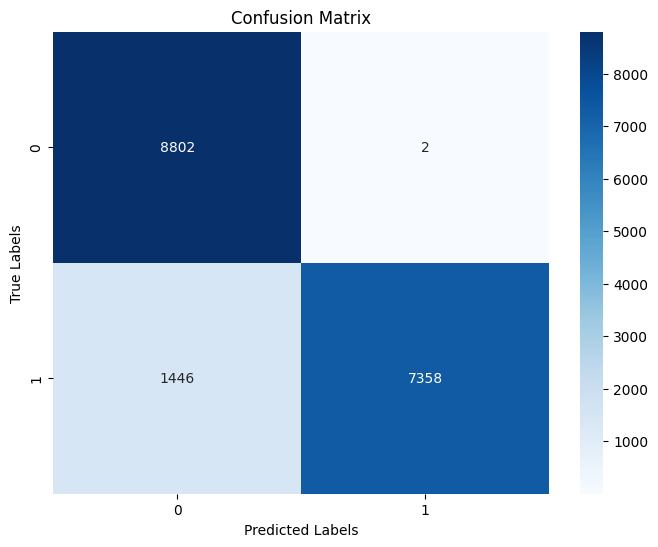

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_te_balanced, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()